In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cPickle, gzip
%matplotlib inline

# Boolean / Fancy Indexing

Just a quick note on fancy and boolean indexing.  This is covered a bit in the Python notebook on the NumPy
library, but lets look specifically at the bit of code we used in the simple learning example today.

First of all, lets create a very simple array of 10 weights with random values:

In [2]:
np.random.seed(42)
weights = np.random.randn(10) # vector of 10 normally distributed weights, mean=0.0, std=1.0
print weights

[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004]


The fancy indexing I was using, and should have talked more about before, is important to understand.

We can query our numpy array to find which values are greater than 0.  This returns an array of boolean
results (true/false), one for each value in the array:

In [3]:
weights > 0

array([ True, False,  True,  True, False, False,  True,  True, False,  True], dtype=bool)

So you can see that the values at indexs 0, 2, 3, 6, 7, 9 are all greater than 0 for the array of random weights.

Further, we can use an array of boolean results like this (a type of fancy indexing) to pull out only the
greater than 0 values from the weights array:

In [4]:
weights[weights > 0]

array([ 0.49671415,  0.64768854,  1.52302986,  1.57921282,  0.76743473,
        0.54256004])

So notice we got a new array of only those values in weights that were greater than 0.  Even further, we can actually use this form of fancy indexing to perform operations only on these > 0 weights.  For example:

In [5]:
weights[weights > 0] + 10

array([ 10.49671415,  10.64768854,  11.52302986,  11.57921282,
        10.76743473,  10.54256004])

In [6]:
weights[weights > 0] += 10
print weights

[ 10.49671415  -0.1382643   10.64768854  11.52302986  -0.23415337
  -0.23413696  11.57921282  10.76743473  -0.46947439  10.54256004]


In the lec-02 notebook we basically used this fancy indexing to only increase and/or decrease the the weights that corresponded to pixels whose value was greater than 0.5.  The statement

```python
active_pixels = (img > 0.5)
```

Was another example of creating a boolean index.  We then used the boolean index saved as active_pixels to only increase/decrease the weights corresponding to the indicated pixels.

# Finding Index of Particular Value

Another thing that could probably use a bit more discussion/explanation was how we were calculating the output
from our simple network, and how we were determining which unit got the most votes and was thus the "winner".

First of all, we calculated the full weighted sum output (without any bias values) of all output units
with a single statement:

```python
output = sigmoid(np.dot(img, weights))

```

We will talk more about this in future, but lets just look at it briefly a bit more here.  This statement is
basically treating the img and weight numpy arrays as matrices, and the ```np.dot()``` function basically
is performing a matrix multiplication between these two matrices.  So to fully understand you need to have
taken and rember some linear algebra.  But lets recreate.  First of all, let me grab an 28x28 image at
random from MNIST, and create a set of random weights:

(784,)
5


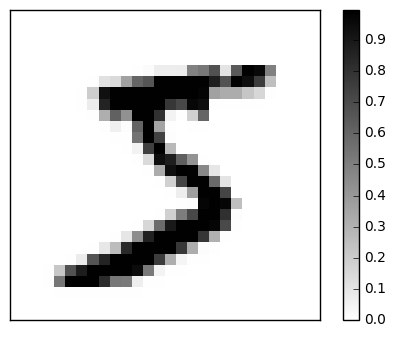

In [7]:
# select one image from MNIST data set for an example
f = gzip.open('data/mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = cPickle.load(f)
f.close()
train_input, train_output = train_set

img_idx = 0 # change this to pick a different image to use
img = train_input[img_idx]
correct_output = train_output[img_idx]

print img.shape
print correct_output

# reshape the image as 28x28 pixels and visualize it in a plot
plt.imshow(img.reshape(28,28), cmap=plt.cm.gray_r, interpolation='None')
plt.xticks([])
plt.yticks([])
plt.colorbar()

In [8]:
# create an array of 784x10 weights as we did before
weights = np.random.randn(784, 10)
print weights.shape

(784, 10)


Notices that the img is effectively a 1x784 vector, and the weights is a 784x10 shaped 2 dimensional matrix.
If we do a matrix multiple of img x weights, we get a 1x784 x 784x10 = 1x10 shaped resulting vector.  And if
you go back and review your linear algebra, each value in the resulting vector will basically be the result
of calculating the weighted sum of the values of each input pixel times each weight, e.g.

$$
\textrm{output}^0 = \sum_{i=0}^{783} \textrm{img}_i \cdot \textrm{weights}_i^0
$$

Or in english, for output unit 0, we get each of the 784 image pixel values, multiply each pixel value by each corresponding
weight, and sum this result up.  By doing the matrix multiplication of the image pixel values times our 
two dimensional weights matrix, we calculate the weighted sum for all 10 output units in 1 vectorized operation:

In [9]:
output = np.dot(img, weights)
print output.shape
print output

(10,)
[ 19.37376204  -3.56171226   6.3387353   -6.11812087  -1.96291226
   3.05741497 -15.76328979  -5.02448338 -16.59472424   7.23715572]


In the lecture-02 notbook, I then put these outputs through the sigmoid/logistic function, just to get you used
to using sigmoid units, but that was not really necessary.  The 10 values we now have, we can think of the "votes"
that each output received, given the current weights for this input image.  We need to determine which unit
"won" the voting contest, which we do by finding the index in the output array with the maximum value.  The
winner had the highest value:

In [10]:
output.max()

19.373762037803939

In the lec-02 notebook I used the np.where function to determine the index of the winning output, which will
correspond for this problem to which digit the network guessed the given input image was.


In [11]:
actual_output = np.where(output == output.max())[0][0]
print actual_output

0


The ```output == output.max()``` statement again produces a boolean index that is true only at the location
in the array where the maximum value was, and is false everywhere else.

In [12]:
output == output.max()

array([ True, False, False, False, False, False, False, False, False, False], dtype=bool)

We then use the ```np.where()``` function, without giving the second and third parameters.  If you don't give 
these parameters, the behavior of np.where() is like this:

In [13]:
np.where(output == output.max())

(array([0]),)

Basically if you don't provide any values to choose from, it returns a tuple, where the first value is an
array of the indices where the condition was true, and the second tuple is empty (not used).  So first we need
to get the first item from the tuple, which contains the array of indices:

In [14]:
np.where(output == output.max())[0]

array([0])

And since only 1 output will be the maximum (ties are very rare and we ignore this possibility here), we can get 
the index of the winning output unit by getting the first item out of this array:

In [15]:
actual_output = np.where(output == output.max())[0][0]
print actual_output

0


Although the ```np.where()``` function here was a bit messy to use, conceptually all we are doing is determining
the index of the winning output unit, which will correspond with the digit number our network is guessing as
the output given an input image.  Notice that this output from the network will be different if we give a 
different input image, since the input pixels will differ in that case.  And obviously, if we start changing
the weights, the output can change in the future for the same input image if the weights differ significantly.

Once we have calculated the actual output our network produced, we can perform the simple learning we discussed,
again using fancy indexing and array slicing capabilities provided by the Python NumPy library.  We can increase the weights to the
correct output by a tiny amount only for those pixels that are on, using the boolean index to find the
active pixels, e.g. this statement:

In [16]:
LEARNING_DELTA = 0.01
active_pixels = (img > 0.5)
weights[active_pixels, correct_output] += LEARNING_DELTA


Here the first index is a boolean index, that is only true for those pixels in the input image that are above
our threshold.  And the second index selects only the weights to the unit that represent our labeled correct
answer.  The effect of this statement is simply to add or increase by 0.01 all of the weights selected from
the active pixels in the image to the correct output unit for this image.

Likewise, we penalized the incorrect output by decreasing the weights from the active_pixels to the 
actual_output unit that was selected by the network:

In [17]:
LEARNING_DELTA = 0.01
active_pixels = (img > 0.5)
weights[active_pixels, actual_output] -= LEARNING_DELTA


As I mentioned in class, when the network is giving the correct output (the actual_output the network guessed
was the same as the correct_output for the input image), the effect for this learning method is a wash.  The same
weights are both increased and then decreased by the same LEARNING_DELTA amount, so they don't end up being changed.